In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.stats import norm
from scipy.stats import t
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import ttest_ind

In [2]:
#Loading the dataset
data_frame = pd.read_csv('train.csv',  header=[0], index_col=[0])
data_frame.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
#To check the columns of the dataset
data_frame.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [5]:
#Checking correlation




# EDA

In [6]:
#plt.style.use(ggplot)

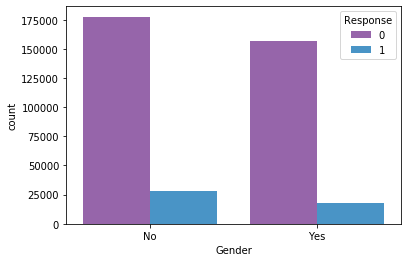

In [7]:
plt.figure()
sns.countplot(x='Gender', hue='Response', data=data_frame, palette=["#9b59b6", "#3498db"])
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

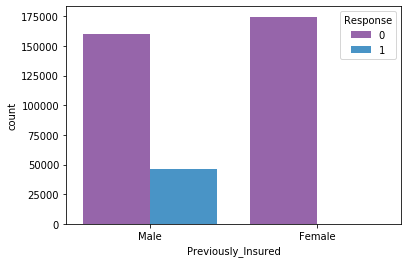

In [8]:
plt.figure()
sns.countplot(x='Previously_Insured', hue='Response', data=data_frame, palette=["#9b59b6", "#3498db"])
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

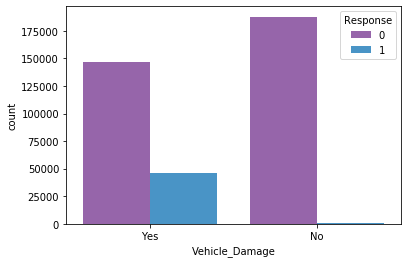

In [9]:
plt.figure()
sns.countplot(x='Vehicle_Damage', hue='Response', data=data_frame, palette=["#9b59b6", "#3498db"])
plt.xticks([0,1], ['Yes', 'No'])
plt.show()

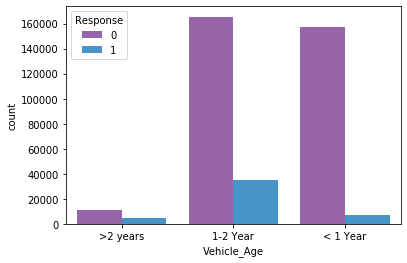

In [10]:
plt.figure()
sns.countplot(x='Vehicle_Age', hue='Response', data=data_frame, palette=["#9b59b6", "#3498db"])
plt.xticks([0,1,2], ['>2 years', '1-2 Year', '< 1 Year'])
plt.show()

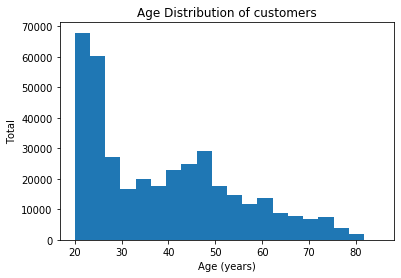

In [11]:
data_frame['Age'].hist(bins=20, grid=False)  # adjust bin width to 5
plt.title("Age Distribution of customers")
plt.xlabel('Age (years)')
plt.ylabel('Total');

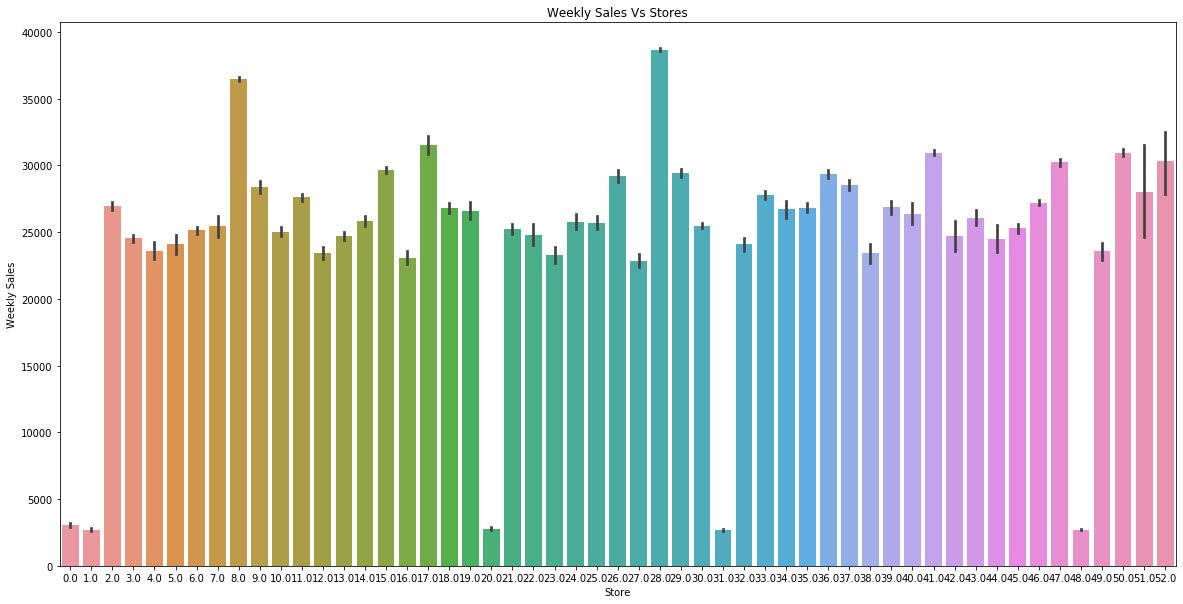

In [12]:

plt.figure(figsize=(20, 10))
sns.barplot(x='Region_Code', y='Annual_Premium', data=data_frame)#,showfliers=False)
plt.ylabel('Weekly Sales')
plt.xlabel('Store')
plt.title("Weekly Sales Vs Stores")
#plt.ylim((0,70000))
plt.show()


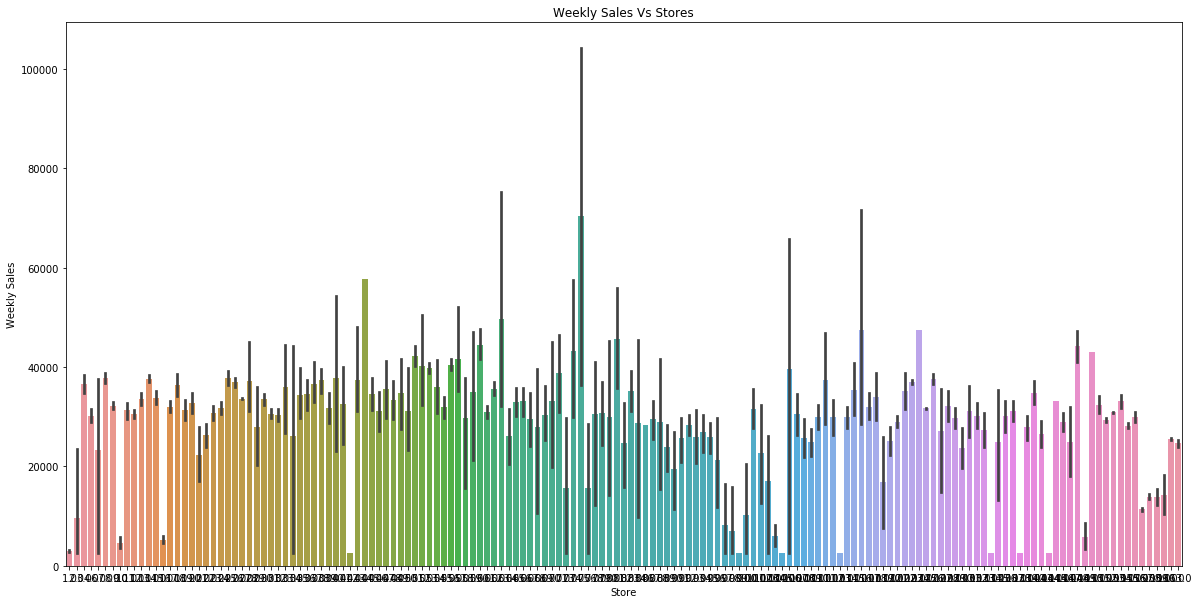

In [13]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Policy_Sales_Channel', y='Annual_Premium', data=data_frame)
plt.ylabel('Weekly Sales')
plt.xlabel('Store')
plt.title("Weekly Sales Vs Stores")
#plt.ylim((0,70000))
plt.show()

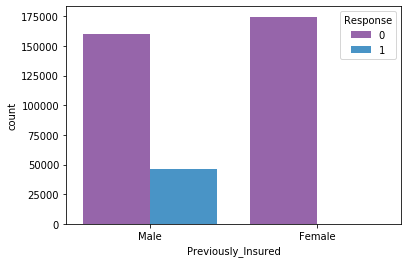

In [14]:
plt.figure()
sns.countplot(x='Previously_Insured', hue='Response', data=data_frame, palette=["#9b59b6", "#3498db"])
plt.xticks([0,1], ['Male', 'Female'])
plt.show()

# Hypothesis Testing

In [15]:
# t-Test
## Is there any significant difference between male and female in the Annual premium paid

data1 = data_frame['Annual_Premium'][data_frame['Gender'] =='Male']
data2 = data_frame['Annual_Premium'][data_frame['Gender'] =='Female']
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

# interpret via critical value
if abs(p) >= .05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=2.267, p=0.023
Reject the null hypothesis that the means are equal.


In [16]:
# t-Test
#Is there any significant difference between those who bought vehicle insurance and those who did not buy vehicle insurance in the Annual premium paid

data1 = data_frame['Annual_Premium'][data_frame['Response'] ==1]
data2 = data_frame['Annual_Premium'][data_frame['Response'] ==0]
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

# interpret via critical value
if abs(p) >= .05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')



t=13.940, p=0.000
Reject the null hypothesis that the means are equal.


In [17]:
#Anova
import scipy.stats as stats

stats.f_oneway(data_frame['Annual_Premium'][data_frame['Age'] <= 30],
               data_frame['Annual_Premium'][(data_frame['Age'] >= 30) & (data_frame['Age'] <= 50)],
               data_frame['Annual_Premium'][data_frame['Age'] >= 50])

F_onewayResult(statistic=958.4503535481864, pvalue=0.0)

# Cleaning the data


In [18]:
# Convert 'Gender', Driving_License ', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response' into categorical variable

data_frame[['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']] = data_frame[['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']].astype('category') 


In [19]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Gender                381109 non-null  category
 1   Age                   381109 non-null  int64   
 2   Driving_License       381109 non-null  category
 3   Region_Code           381109 non-null  category
 4   Previously_Insured    381109 non-null  category
 5   Vehicle_Age           381109 non-null  category
 6   Vehicle_Damage        381109 non-null  category
 7   Annual_Premium        381109 non-null  float64 
 8   Policy_Sales_Channel  381109 non-null  category
 9   Vintage               381109 non-null  int64   
 10  Response              381109 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 24.9 MB


In [20]:
data_frame.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


In [21]:
#To find the unique count of categorical variable
data_frame['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [22]:
data_frame['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [23]:
data_frame['Region_Code'].value_counts().head()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
Name: Region_Code, dtype: int64

In [24]:
data_frame['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [25]:
data_frame['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [26]:
data_frame['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [27]:
data_frame['Policy_Sales_Channel'].value_counts().head()

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
Name: Policy_Sales_Channel, dtype: int64

In [28]:
 data_frame['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [29]:
 data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Gender                381109 non-null  category
 1   Age                   381109 non-null  int64   
 2   Driving_License       381109 non-null  category
 3   Region_Code           381109 non-null  category
 4   Previously_Insured    381109 non-null  category
 5   Vehicle_Age           381109 non-null  category
 6   Vehicle_Damage        381109 non-null  category
 7   Annual_Premium        381109 non-null  float64 
 8   Policy_Sales_Channel  381109 non-null  category
 9   Vintage               381109 non-null  int64   
 10  Response              381109 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 24.9 MB


# Dealing with categorical variables

In [30]:
dummy_df = pd.get_dummies( data_frame, drop_first=True)
dummy_df.head()


,Age,Annual_Premium,Vintage,Gender_Male,Driving_License_1,Region_Code_1.0,Region_Code_2.0,Region_Code_3.0,Region_Code_4.0,Region_Code_5.0,...,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0,Response_1
id,,,,,,,,,,,,,,,,,,,,,
1,44,40454.0,217,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,76,33536.0,183,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,38294.0,27,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,21,28619.0,203,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29,27496.0,39,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
data_frame = pd.DataFrame(dummy_df)

In [32]:
x = data_frame.drop('Response_1', axis=1)
y = data_frame['Response_1']
x_train, x_test, y_train, y_test = tts(x, y, train_size=0.7, random_state=1)

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled
X_train = pd.DataFrame(data=x_train_scaled, columns = list(x_train.columns))

x_test_scaled = scaler.transform(x_test)
X_test = pd.DataFrame(data=x_test_scaled, columns = list(x_test.columns))

In [34]:
#knn= KNeighborsClassifier?

iter_size =25
number_of_neighbors = range(1,iter_size)
knn= KNeighborsClassifier()
cvals = 5
params = {'n_neighbors':number_of_neighbors}


In [ ]:
model = RandomizedSearchCV(knn,params,cv=cvals)
model.fit(X_train,y_train)

In [ ]:
print(model.best_params_)
print(model.best_score_)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test,y_pred)*100) 